# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_SilentHill_1.csv")
df.head()

,userName,score,at,content
0,Avey,1,2024-04-25 12:50:48,Memberi dislek tidak sesuai ekspektasi 👎🏿
1,War Yono,2,2024-04-03 12:47:14,Ga bisa kebuka game nya
2,Mauli Dan,5,2024-03-27 16:05:48,ini game horror PT silent hill terbaru guys
3,Joshua Nggiu,5,2024-03-13 09:07:39,Terima kasih sudah rilis game ini aku sangat s...
4,注意note,1,2024-03-02 22:58:01,Sampah


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Memberi dislek tidak sesuai ekspektasi 👎🏿,Avey,2024-04-25 12:50:48
1,Ga bisa kebuka game nya,War Yono,2024-04-03 12:47:14
2,ini game horror PT silent hill terbaru guys,Mauli Dan,2024-03-27 16:05:48
3,Terima kasih sudah rilis game ini aku sangat s...,Joshua Nggiu,2024-03-13 09:07:39
4,Sampah,注意note,2024-03-02 22:58:01
...,...,...,...
194,Gwe kira game dasar ampas,Muhammad Rizaldi,2023-11-01 06:08:19
195,kena tipu gua bjirr 🗿🗿🗿,Jack gaming,2023-11-01 06:07:15
196,Game ngk jelas,Tommy Tanu,2023-11-01 06:03:19
197,ini offline atau online coy?,Starlaw,2023-11-01 05:48:53


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,198,199,199
top,Bagus,Avey,2024-04-25 12:50:48
freq,2,1,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(198, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,memberi dislek tidak sesuai ekspektasi,Avey,2024-04-25 12:50:48
1,ga bisa kebuka game nya,War Yono,2024-04-03 12:47:14
2,ini game horror pt silent hill terbaru guys,Mauli Dan,2024-03-27 16:05:48
3,terima kasih sudah rilis game ini aku sangat s...,Joshua Nggiu,2024-03-13 09:07:39
4,sampah,注意note,2024-03-02 22:58:01
...,...,...,...
194,gwe kira game dasar ampas,Muhammad Rizaldi,2023-11-01 06:08:19
195,kena tipu gua bjirr,Jack gaming,2023-11-01 06:07:15
196,game ngk jelas,Tommy Tanu,2023-11-01 06:03:19
197,ini offline atau online coy,Starlaw,2023-11-01 05:48:53


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,memberi dislek tidak sesuai ekspektasi,Avey,2024-04-25 12:50:48
1,ga bisa kebuka game nya,War Yono,2024-04-03 12:47:14
2,ini game horror pt silent hill terbaru guys,Mauli Dan,2024-03-27 16:05:48
3,terima kasih sudah rilis game ini aku sangat s...,Joshua Nggiu,2024-03-13 09:07:39
4,sampah,注意note,2024-03-02 22:58:01
...,...,...,...
194,gwe kira game dasar ampas,Muhammad Rizaldi,2023-11-01 06:08:19
195,kena tipu gua bjirr,Jack gaming,2023-11-01 06:07:15
196,game ngk jelas,Tommy Tanu,2023-11-01 06:03:19
197,ini offline atau online coy,Starlaw,2023-11-01 05:48:53


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,memberi dislek sesuai ekspektasi,Avey,2024-04-25 12:50:48
1,ga kebuka game nya,War Yono,2024-04-03 12:47:14
2,game horror pt silent hill terbaru guys,Mauli Dan,2024-03-27 16:05:48
3,terima kasih rilis game aku sangat senang main...,Joshua Nggiu,2024-03-13 09:07:39
4,sampah,注意note,2024-03-02 22:58:01
...,...,...,...
194,gwe kira game dasar ampas,Muhammad Rizaldi,2023-11-01 06:08:19
195,kena tipu gua bjirr,Jack gaming,2023-11-01 06:07:15
196,game ngk jelas,Tommy Tanu,2023-11-01 06:03:19
197,offline online coy,Starlaw,2023-11-01 05:48:53


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                  [memberi, dislek, sesuai, ekspektasi]
1                                [ga, kebuka, game, nya]
2        [game, horror, pt, silent, hill, terbaru, guys]
3      [terima, kasih, rilis, game, aku, sangat, sena...
4                                               [sampah]
                             ...                        
194                      [gwe, kira, game, dasar, ampas]
195                             [kena, tipu, gua, bjirr]
196                                   [game, ngk, jelas]
197                               [offline, online, coy]
198                               [ngestuck, login, ini]
Name: content, Length: 198, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SilentHill_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SilentHill_1.csv', encoding = 'latin1')
df_clean

,content
0,beri dislike sesuai ekspektasi
1,ga buka game nya
2,game horror pt silent hill baru guys
3,terima kasih rilis game aku sangat senang main...
4,sampah
...,...
193,gwe kira game dasar ampas
194,kena tipu gua bjirr
195,game ngga jelas
196,offline online coy


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SilentHill_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SilentHill_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SilentHill_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,beri dislike sesuai ekspektasi,give dislike according to expectations
1,1,ga buka game nya,Don't open the game.
2,2,game horror pt silent hill baru guys,Game horror pt silent new hill guys
3,3,terima kasih rilis game aku sangat senang main...,Thank you. Release the game. I'm so happy to p...
4,4,sampah,junk
...,...,...,...
193,193,gwe kira game dasar ampas,I thought it was a basic game of impregnation.
194,194,kena tipu gua bjirr,I've been tricked.
195,195,game ngga jelas,Unclear game
196,196,offline online coy,"Offline online, man."


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SilentHill_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,beri dislike sesuai ekspektasi,give dislike according to expectations
1,1,ga buka game nya,Don't open the game.
2,2,game horror pt silent hill baru guys,Game horror pt silent new hill guys
3,3,terima kasih rilis game aku sangat senang main...,Thank you. Release the game. I'm so happy to p...
4,4,sampah,junk
...,...,...,...
193,193,gwe kira game dasar ampas,I thought it was a basic game of impregnation.
194,194,kena tipu gua bjirr,I've been tricked.
195,195,game ngga jelas,Unclear game
196,196,offline online coy,"Offline online, man."


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 49
Netral = 66
Negatif = 83

Total Data Seluruhnya : 198


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,beri dislike sesuai ekspektasi,give dislike according to expectations,Netral
1,1,ga buka game nya,Don't open the game.,Negatif
2,2,game horror pt silent hill baru guys,Game horror pt silent new hill guys,Negatif
3,3,terima kasih rilis game aku sangat senang main...,Thank you. Release the game. I'm so happy to p...,Positif
4,4,sampah,junk,Netral
...,...,...,...,...
193,193,gwe kira game dasar ampas,I thought it was a basic game of impregnation.,Negatif
194,194,kena tipu gua bjirr,I've been tricked.,Netral
195,195,game ngga jelas,Unclear game,Negatif
196,196,offline online coy,"Offline online, man.",Netral


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,beri dislike sesuai ekspektasi,give dislike according to expectations,Netral
1,ga buka game nya,Don't open the game.,Negatif
2,game horror pt silent hill baru guys,Game horror pt silent new hill guys,Negatif
3,terima kasih rilis game aku sangat senang main...,Thank you. Release the game. I'm so happy to p...,Positif
4,sampah,junk,Netral
...,...,...,...
193,gwe kira game dasar ampas,I thought it was a basic game of impregnation.,Negatif
194,kena tipu gua bjirr,I've been tricked.,Netral
195,game ngga jelas,Unclear game,Negatif
196,offline online coy,"Offline online, man.",Netral


# **Visualisasi**


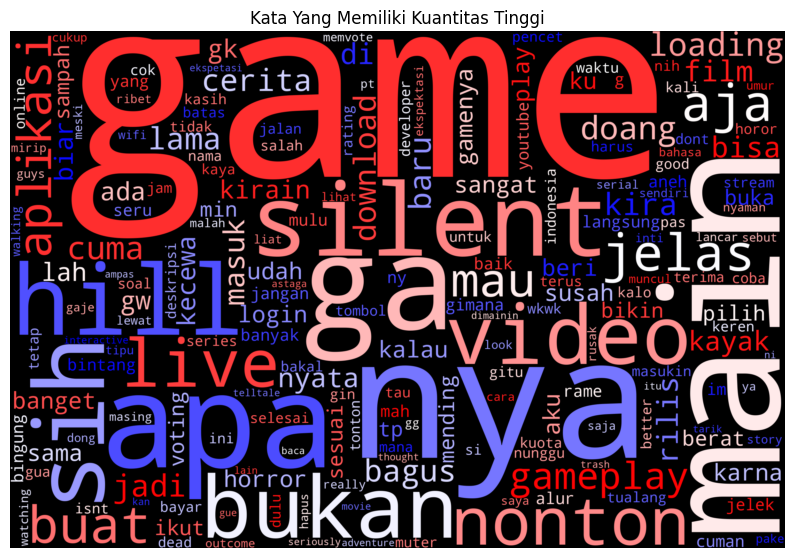

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


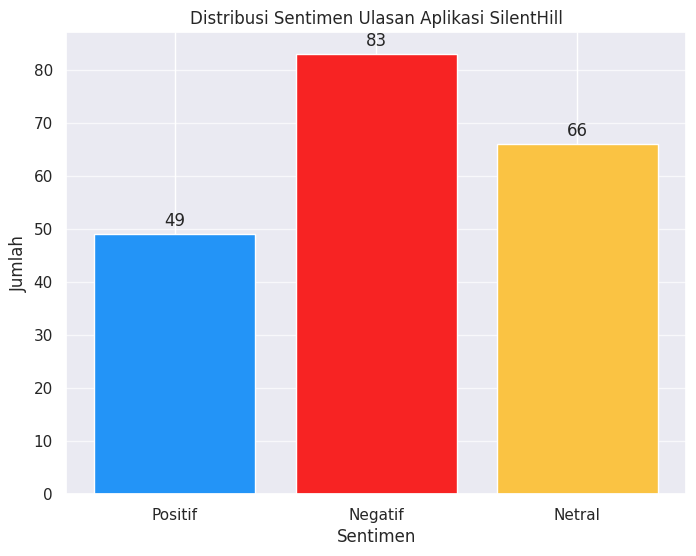

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")


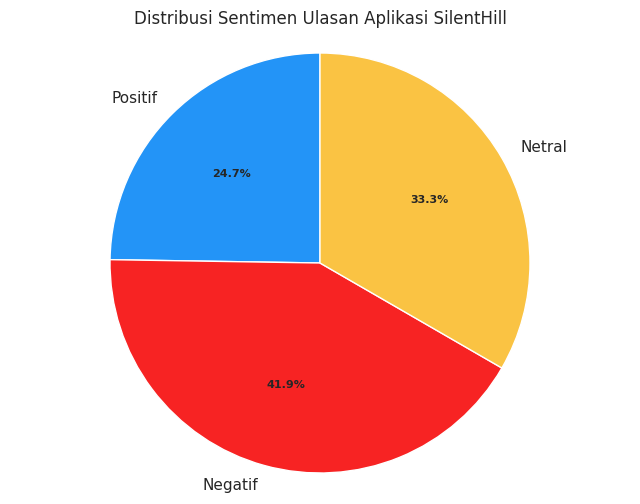

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")

In [38]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,ga buka game nya,Don't open the game.,Negatif
2,game horror pt silent hill baru guys,Game horror pt silent new hill guys,Negatif
3,terima kasih rilis game aku sangat senang main...,Thank you. Release the game. I'm so happy to p...,Positif
6,game gagal,game failed,Negatif
7,aplikasi ada batas umur daftar online nontonny...,The application has an online age limit on its...,Negatif
...,...,...,...
184,kirain game horor,Think of a horror game.,Negatif
185,gamenya g jelas cok habiskouta aj nih game,"It's not a game, it's a game, it's a game.",Negatif
190,game baru keluar pas coba main loading screen ...,New game comes out when trying to load the scr...,Negatif
193,gwe kira game dasar ampas,I thought it was a basic game of impregnation.,Negatif


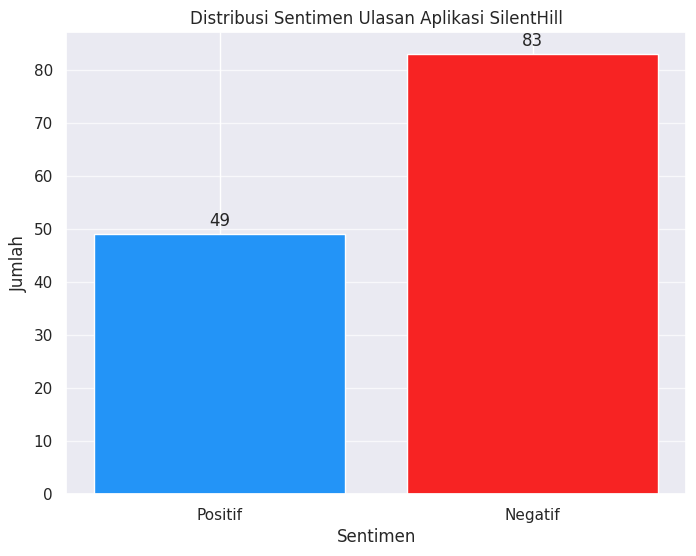

In [39]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")


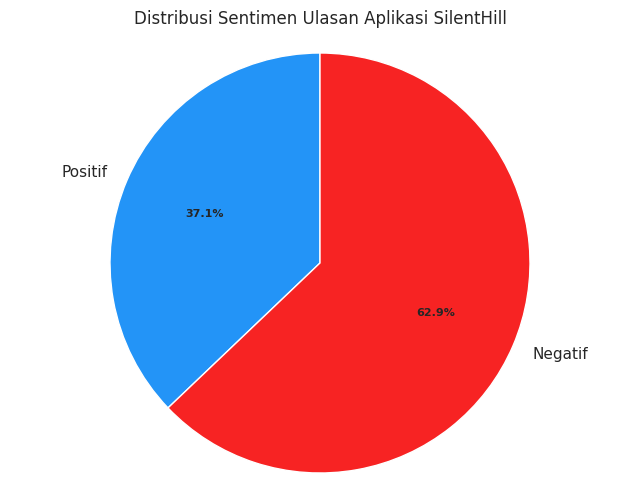

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")

In [41]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,ga buka game nya,Don't open the game.,0
2,game horror pt silent hill baru guys,Game horror pt silent new hill guys,0
3,terima kasih rilis game aku sangat senang main...,Thank you. Release the game. I'm so happy to p...,1
6,game gagal,game failed,0
7,aplikasi ada batas umur daftar online nontonny...,The application has an online age limit on its...,0
...,...,...,...
184,kirain game horor,Think of a horror game.,0
185,gamenya g jelas cok habiskouta aj nih game,"It's not a game, it's a game, it's a game.",0
190,game baru keluar pas coba main loading screen ...,New game comes out when trying to load the scr...,0
193,gwe kira game dasar ampas,I thought it was a basic game of impregnation.,0


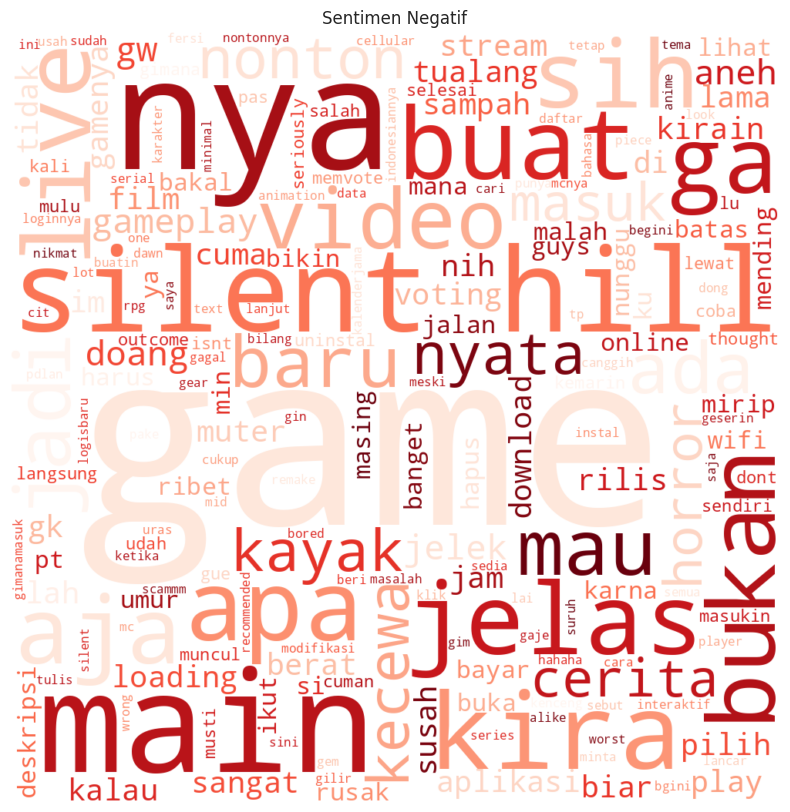

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

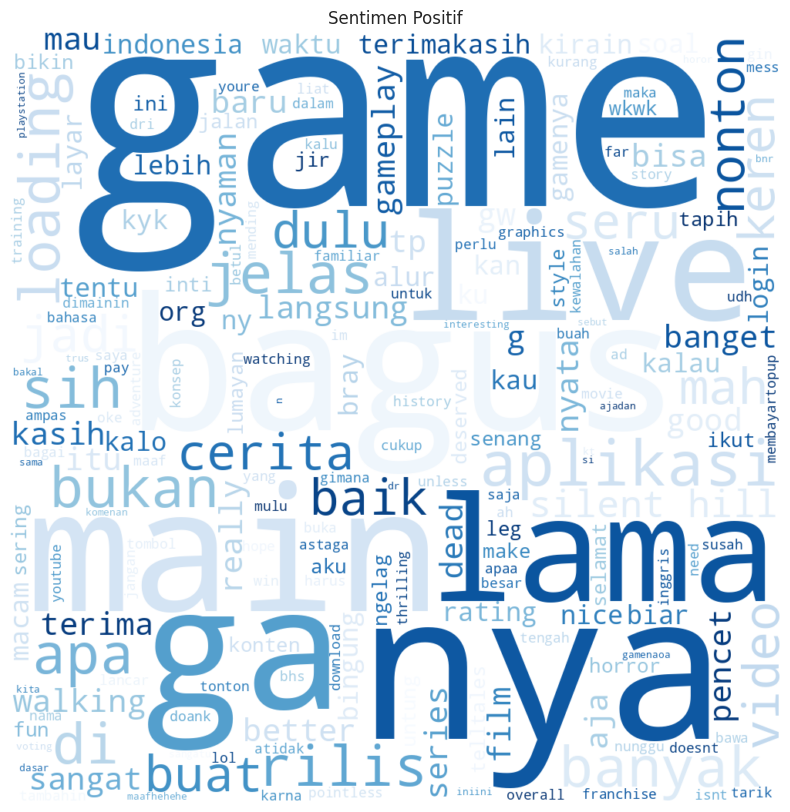

In [43]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [44]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
0    83
1    49
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [46]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train

140                                         bagus sekali
141    nyesal download bukan game malah movie game cu...
1                                       ga buka game nya
17                                         game ga jelas
183                   gw kira game nyata isi cuman video
                             ...                        
96     kau jelas iniini gamenaoa video ajadan kau bua...
153                                               mantap
20                                   bukan game jir wkwk
134                                            game aneh
149                                         game apa sih
Name: content, Length: 105, dtype: object

In [48]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [49]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.6666666666666666
Akurasi untuk c = 0.05: 0.7037037037037037
Akurasi untuk c = 0.25: 0.7037037037037037
Akurasi untuk c = 0.5: 0.7037037037037037
Akurasi untuk c = 0.75: 0.7037037037037037
Akurasi untuk c = 1: 0.7037037037037037


In [52]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [53]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7037037037037037 


In [54]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.70
[[17  1]
 [ 7  2]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.67      0.22      0.33         9

    accuracy                           0.70        27
   macro avg       0.69      0.58      0.57        27
weighted avg       0.69      0.70      0.65        27



In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[17  1]
 [ 7  2]]

True Positives (TP) =  17

True Negatives (TN) =  2

False Positives (FP) =  1

False Negatives (FN) =  7

Accuracy =  0.7037037037037037


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

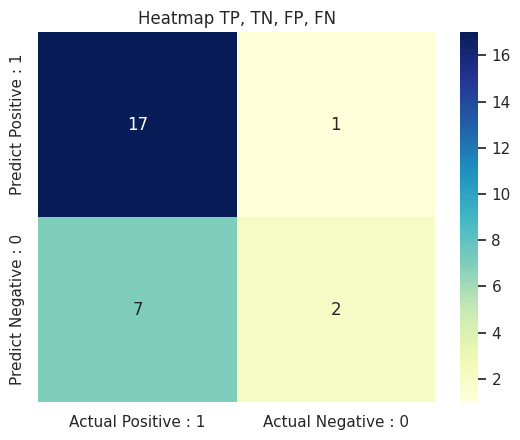

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [57]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [58]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7037


In [59]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2963


# **Testing**


In [60]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 89.76%
Probabilitas: 89.7598848468843 %


In [61]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 93.77%
Probabilitas: 93.7689973321013 %
